# PILL 4: Linear models



# 1. Generative and discriminative models.

In literature we will find two complementary visions of the learning problem according to the problem they solve, generative vs discriminative models. 

+ **Generative models** goal is modeling the data. This consists of estimating the joint probability density function of $x,y$, $P(x,y)$. With this description, the problem of classification is selecting the model that maximizes the posterior probability of the labels given the data, $P(y|x)$. This is done by applying Bayes rule to relate the posterior distribution to the likelihood and the priors.

$$\underset{w}{\text{maximize}}\; P_w(y|x)$$

+ **Discriminative models** are concerned in finding a good approximation of the decision function even if it means losing the information about the concrete description of the data. In this setting we may find Maximum Likelihood Estimated methods such as logistic regression and other explicit function models such as SVM.

In this notebook we will introduce two very simple examples of each of those families. Both models are linear in the parameters and yield very simple decision boundaries, linear or quadratic boundaries.

Linear models are defined as $h: {\bf R}^n \rightarrow {\bf R}$ such that $h(x)=a^T x + b$, where $a,x \in {\bf R}^n$ and $b \in {\bf R}$. In this section we will review two very important models that are modeled as linear and apply them to a couple of problems.

# 2. Logistic Regression

Logistic regression is a **linear classifier** that is based on maximum likelihood principles to jointly model the classification boundary and the certainty of the fit. It is based on fitting a logistic function to the data.

$$p(x_i|y) = \frac{1}{1+e^{-(a^Tx+b)}}$$

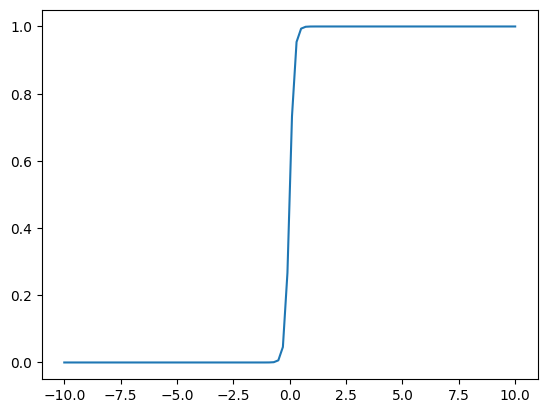

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
beta= 10.
x = np.linspace(-10,10,100)
p = 1./(1+np.exp(-beta*x)) 
plt.plot(x,p)
plt.show()

<div class = "alert alert-success" style = "border-radius:10px"> **EXERCISE: ** What are hypothesis with respect to the probability modeling?</div>

<div class = "alert alert-success" style ="border-radius:10px">**EXERCISE: ** Change the value of $\beta$ and describe its effect.</div>

### Logistic Regression: Likelihood, Log-Likelihood and Gradients

We are in **binary classification**, with data $\{(x_i, y_i)\}_{i=1}^N$, where $y_i \in \{0,1\}$ and $x_i \in \mathbb{R}^d$.

We model the **probability of the label given the input**:
$$
p(y_i \mid x_i) = p(y_i = 1 \mid x_i)^{y_i} \, (1 - p(y_i = 1 \mid x_i))^{1 - y_i}.
$$

The **likelihood** of the whole dataset is
$$
\mathcal{L}(a,b) = \prod_{i=1}^N p(y_i \mid x_i),
$$
and we usually work with the **log-likelihood**:
$$
\ell(a,b) = \log \mathcal{L}(a,b)
= \sum_{i=1}^N \Big[ y_i \log p_i + (1-y_i)\log(1-p_i) \Big],
$$
where
$$
p_i := p(y_i = 1 \mid x_i).
$$

---

### Logistic (Sigmoid) Model

In logistic regression, we model
$$
p_i = p(y_i = 1 \mid x_i) = \sigma(z_i), \quad z_i = a^\top x_i + b,
$$
where
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
is the **logistic (sigmoid) function**.

A key identity is the derivative
$$
\sigma'(z) = \sigma(z)\big(1 - \sigma(z)\big).
$$

Therefore, for a single sample $x_i$:
$$
\frac{\partial p_i}{\partial a} 
= \frac{\partial \sigma(z_i)}{\partial z_i} \frac{\partial z_i}{\partial a}
= \sigma(z_i)\big(1 - \sigma(z_i)\big)x_i 
= p_i(1-p_i)x_i,
$$
$$
\frac{\partial p_i}{\partial b} 
= \sigma(z_i)\big(1 - \sigma(z_i)\big)
= p_i(1-p_i).
$$

---

### Gradient of the Log-Likelihood

Recall
$$
\ell(a,b)
= \sum_{i=1}^N \Big[ y_i \log p_i + (1-y_i)\log(1-p_i) \Big].
$$

**Derivative with respect to $a$:**
$$
\frac{\partial \ell}{\partial a}
= \sum_{i=1}^N \left[
y_i \frac{1}{p_i} \frac{\partial p_i}{\partial a}
+ (1-y_i)\frac{1}{1-p_i} \frac{\partial (1-p_i)}{\partial a}
\right].
$$

Note that $\frac{\partial (1-p_i)}{\partial a} = -\frac{\partial p_i}{\partial a}$, so
$$
\frac{\partial \ell}{\partial a}
= \sum_{i=1}^N \left[
y_i \frac{1}{p_i} \frac{\partial p_i}{\partial a}
- (1-y_i)\frac{1}{1-p_i} \frac{\partial p_i}{\partial a}
\right]
= \sum_{i=1}^N \frac{\partial p_i}{\partial a}
\left[
\frac{y_i}{p_i} - \frac{1-y_i}{1-p_i}
\right].
$$

Substitute $\frac{\partial p_i}{\partial a} = p_i(1-p_i)x_i$:
$$
\frac{\partial \ell}{\partial a}
= \sum_{i=1}^N p_i(1-p_i)x_i \left[
\frac{y_i}{p_i} - \frac{1-y_i}{1-p_i}
\right].
$$

Now simplify the bracket:
$$
p_i(1-p_i)\left[
\frac{y_i}{p_i} - \frac{1-y_i}{1-p_i}
\right]
= y_i(1-p_i) - (1-y_i)p_i
= y_i - p_i.
$$

Thus we get the **compact form**:
$$
\boxed{
\frac{\partial \ell}{\partial a} = \sum_{i=1}^N (y_i - p_i)x_i
}
$$

**Derivative with respecto to $b$:**

By the same reasoning,
$$
\boxed{
\frac{\partial \ell}{\partial b} = \sum_{i=1}^N (y_i - p_i)
}
$$

---

### Connection to Loss Minimization

In practice, we usually **minimize** the *negative* log-likelihood (also called cross-entropy loss):
$$
J(a,b) = -\ell(a,b).
$$

Then the gradients become:
$$
\nabla_a J = \sum_{i=1}^N (p_i - y_i)x_i,
\quad
\nabla_b J = \sum_{i=1}^N (p_i - y_i).
$$

So a very intuitive summary is:

> **Gradient = (prediction − label) × input features.**

This is the core result behind gradient-based training of logistic regression.


Let us solve this using gradient descent:

[[1, 0.5], [0.5, 1]]
(200, 2) (200,)


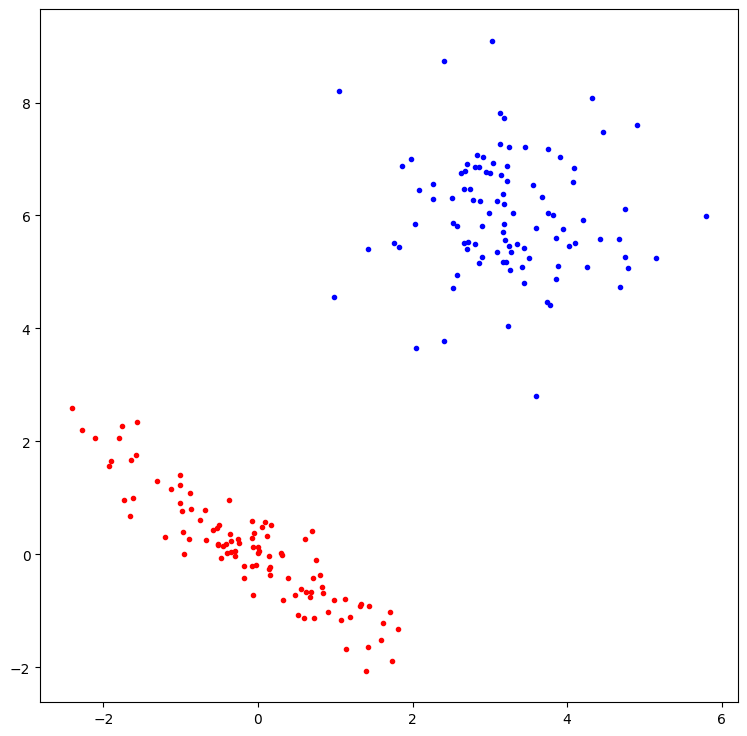

In [2]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[1,-0.9],[-0.9,1]]
m2 = [3.,6.]
s2 = [[1,0],[0,1]]
m3 = [4.,-1.]
s3 = [[1,0.5],[0.5,1]]
print (s3)
c1 = np.random.multivariate_normal(m1,s1,100)
c2 = np.random.multivariate_normal(m2,s2,100)


x= np.r_[c1,c2]
y= np.r_[np.zeros(c1.shape[0]),np.ones(c2.shape[0])]


print (x.shape,y.shape)
import matplotlib.pyplot as plt


plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')


plt.gcf().set_size_inches((9,9))
plt.show()

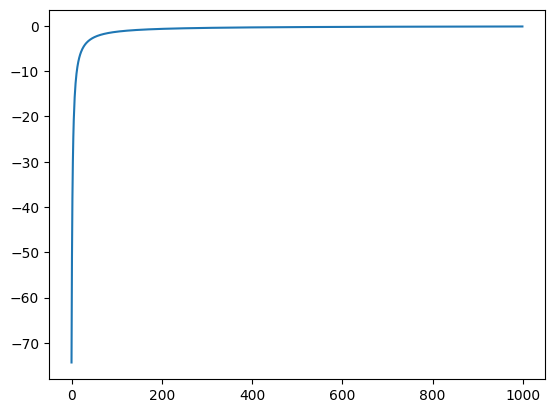

In [3]:
#gradient descent

def logit(x,a,b):
    return 1./(1+np.exp(-(np.sum(a*x,axis=1)+b)))

def evaluate_objective(x,y,a,b):
    return np.sum(y*np.log(logit(x,a,b))+(1-y)*np.log((1-logit(x,a,b))))
    
def partial_a_objective(x,y,a,b):
    partial = x*np.tile((y*np.exp(-(np.sum(a*x,axis=1)+b))*logit(x,a,b)-(1-y)*logit(x,a,b))[:,np.newaxis],(1,2))
    return np.sum(partial,axis=0)

def partial_b_objective(x,y,a,b):
    partial = (y*np.exp(-(np.sum(a*x,axis=1)+b))*logit(x,a,b)-(1-y)*logit(x,a,b))
    return np.sum(partial)


n_iters = 1000
nu=0.01
a = np.random.rand(1,x.shape[1])
b = np.random.rand(1)
conv = []
for i in range(n_iters):
    at = a + nu*partial_a_objective(x,y,a,b) #maximize
    b = b + nu*partial_b_objective(x,y,a,b) #maximize
    a = at
    conv.append(evaluate_objective(x,y,a,b))
    

plt.plot(conv)
plt.show()

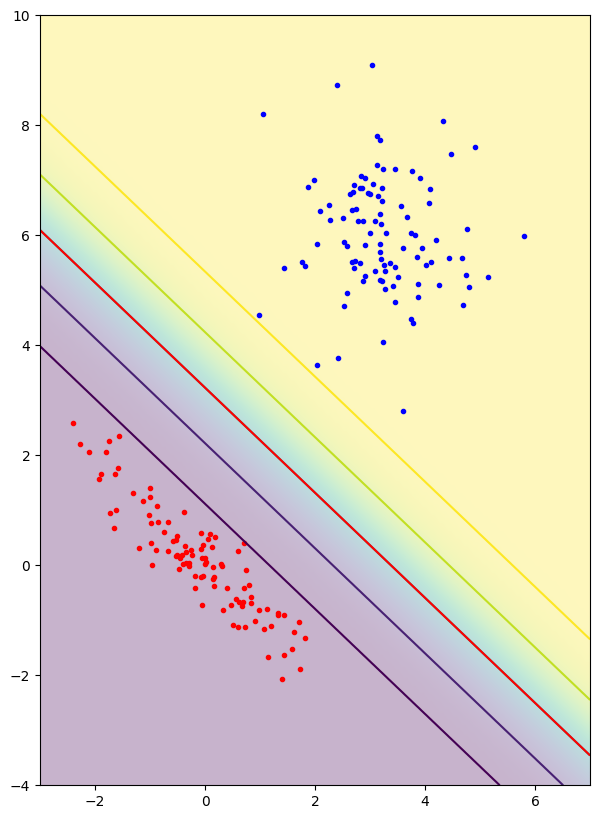

In [4]:
#my code
xx,yy = np.meshgrid(np.linspace(-3,7,200),np.linspace(-4,10,200))
viz=np.c_[xx.ravel(),yy.ravel()]


z = logit(viz,a,b)

plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')
plt.gca().set_xlim([-3.,7.])
plt.gca().set_ylim([-4.,10.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-3,7,-4,10),alpha=0.3, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)),[0.01,0.1,0.5,0.9,0.99])
plt.contour(xx,yy,z.reshape((200,200)),[0.5],colors='red')

plt.gcf().set_size_inches((20,10))
plt.show()

(200, 2) (200,)


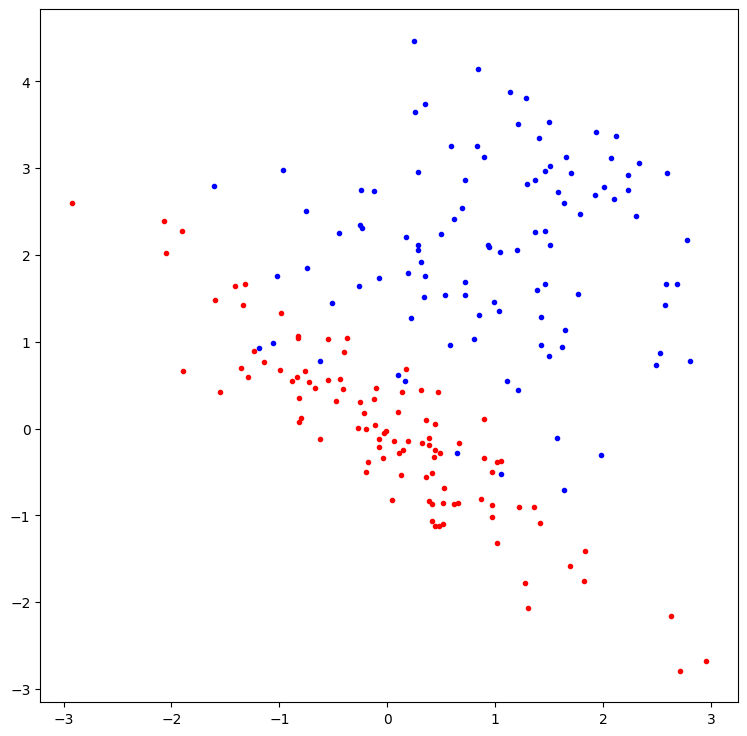

In [5]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[1,-0.9],[-0.9,1]]
m2 = [1.,2.]
s2 = [[1,0],[0,1]]
c1 = np.random.multivariate_normal(m1,s1,100)
c2 = np.random.multivariate_normal(m2,s2,100)


x= np.r_[c1,c2]
y= np.r_[np.zeros(c1.shape[0]),np.ones(c2.shape[0])]


print (x.shape,y.shape)
import matplotlib.pyplot as plt


plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')


plt.gcf().set_size_inches((9,9))
plt.show()

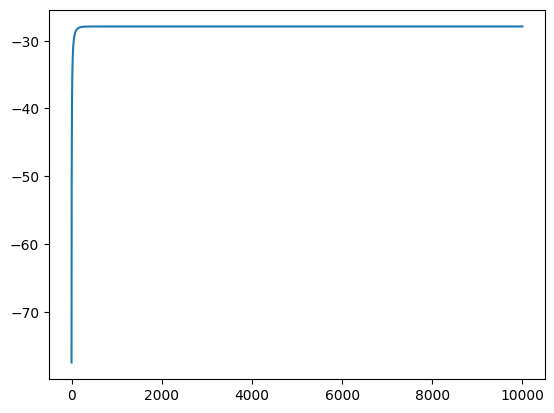

In [6]:
#gradient descent

def logit(x,a,b):
    return 1./(1+np.exp(-(np.sum(a*x,axis=1)+b)))

def evaluate_objective(x,y,a,b):
    return np.sum(y*np.log(logit(x,a,b))+(1-y)*np.log((1-logit(x,a,b))))
    
def partial_a_objective(x,y,a,b):
    partial = x*np.tile((y*np.exp(-(np.sum(a*x,axis=1)+b))*logit(x,a,b)-(1-y)*logit(x,a,b))[:,np.newaxis],(1,2))
    return np.sum(partial,axis=0)

def partial_b_objective(x,y,a,b):
    partial = (y*np.exp(-(np.sum(a*x,axis=1)+b))*logit(x,a,b)-(1-y)*logit(x,a,b))
    return np.sum(partial)


n_iters = 10000
nu=0.01
a = np.random.rand(1,x.shape[1])
b = np.random.rand(1)
conv = []
for i in range(n_iters):
    at = a + nu*partial_a_objective(x,y,a,b) #maximize
    b = b + nu*partial_b_objective(x,y,a,b) #maximize
    a = at
    conv.append(evaluate_objective(x,y,a,b))
    

plt.plot(conv)
plt.show()

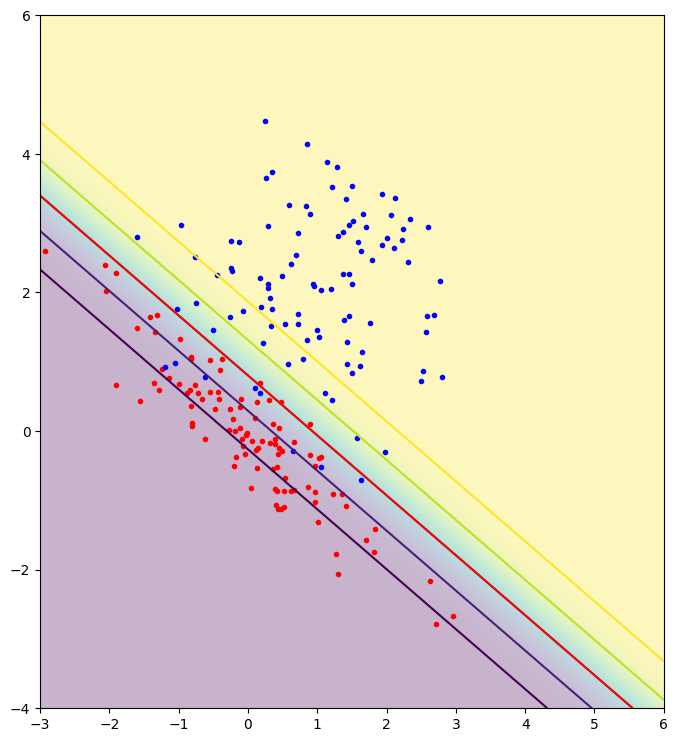

In [7]:
#my code
xx,yy = np.meshgrid(np.linspace(-3,6,200),np.linspace(-4,6,200))
viz=np.c_[xx.ravel(),yy.ravel()]

z = logit(viz,a,b)

plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')
plt.gca().set_xlim([-3.,6.])
plt.gca().set_ylim([-4.,6.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-3,6,-4,6),alpha=0.3, vmin=0, vmax=1)

plt.contour(xx,yy,z.reshape((200,200)),[0.01,0.1,0.5,0.9,0.99])
plt.contour(xx,yy,z.reshape((200,200)),[0.5],colors='red')

plt.gcf().set_size_inches((9,9))
plt.show()

# 3. Naive Bayes

In this section, the Naive Bayes classifier is introduced by studying the case of document classification as a simple instance of a Natural Language Processing problem. 

But before that, let us apply our programatic knowledge and check what the boundary using Naive Bayes looks like.

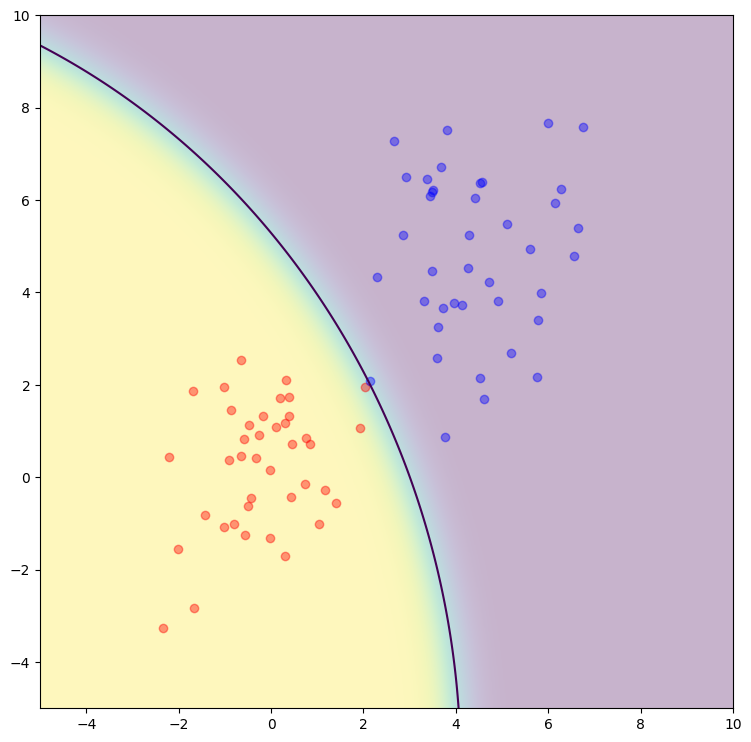

In [8]:

%reset -f
%matplotlib inline
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
#Create some data
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

nb = GaussianNB()
nb.fit(X,y.ravel())

#Create grid data for visualization purposes
delta = 0.025
xx = np.arange(-5.0, 10.0, delta)
yy = np.arange(-5.0, 10.0, delta)
XX, YY = np.meshgrid(xx, yy)

Z=nb.predict_proba(np.c_[XX.ravel(), YY.ravel()])
Z = Z[:,1].reshape(XX.shape)

plt.figure()
idxplus = y==1
idxminus = y==-1
idxplus = idxplus.flatten()
idxminus = idxminus.flatten()
plt.scatter(X[idxplus,0],X[idxplus,1],color='r',alpha=0.4)
plt.scatter(X[idxminus,0],X[idxminus,1],color='b',alpha=0.4)
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=0, vmax=1)
plt.contour(XX,YY,Z,[0.5])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.show()

>If the boundary is not linear why is it considered a linear model? It is not a linear model, though it is an affine model with respect to the weights. In the particular case of text classification we will use certain probability density functions that will make the model linear.

## 2.1 Basic document representation

In text classification, we are given a description $x \in {\bf R}^d$ of a document $\delta$ and a fixed set of classes $y \in \{c_1, \dots, c_K\}$, for example the document topic. Given a new document, our goal is to predict the most probable class.

A very simple description of a document is the **bag-of-words** description. This representation transforms a complete text to a vector of $d$ predefined words. The set of predefined words is selected by the practicioner. For example, the list can consist of the set of all words in a given language. 

<b>Example 1:</b>
Suppose we are given four different documents belonging to the topics $y=\{\text{'economics'},\text{'technology'}\}$ and we select as our representation the following bag-of-words $x = \{\text{'market'}, \text{'stock'}, \text{'price'}, \text{'application'}, \text{'mobile'}, \text{'google'}\}$. We can count the number of times a certain term appears in that document and expect that this description is discriminative enough for identifying the document topic. Check the following example:

<table border="1">
<tr>
<td></td>
<td>market</td>
<td>stock</td>
<td>price</td>
<td>application</td>
<td>mobile</td>
<td>google</td>
</tr>
<tr>
<td>document 1('economics')</td>
<td>1</td>
<td>2</td>
<td>3</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>document 2('economics')</td>
<td>0</td>
<td>1</td>
<td>2</td>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>document 3('technology')</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>2</td>
<td>3</td>
<td>1</td>
</tr>
<tr>
<td>document 4('technology')</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>2</td>
<td>3</td>
<td>0</td>
</tr>
</table>

In this representation, document 2 is represented by the vector (0,1,2,0,0,1). We can alternatively use a binary value representing whether a term appears or not in the document. In this last case document would be represesnted by (0,1,1,0,0,1).

Observe that this is a context free representation, i.e. the order of the words is not considered. Consider the sentences "Google reduces the prices of applications in App market" and "The number of aplications in Google App market with cheap prices is reduced by 20%". The representation for both sentences is the same, though the exact meaning of both sentences is completely different. However, this kind of representation may be enough for identifying that both refers to $\text{'technology'}$.


## 2.2 The Naive Bayes classifier

Naive Bayes is an instance of a Bayessian classifier. In this framework, the problem of classification consists of selecting the class with Maximum A Posteriori (MAP) probability, i.e. $$\hat{y} = \arg\max_y p(y|x).$$

In order to find this quantity we use the Bayes equation,

$$ p(x,y) = p(x|y)p(y) = p(y|x)p(x),$$

and

$$ p(y|x) = \frac{p(x|y)p(y)}{p(x)}.$$

In order to compute the MAP the quantities $p(x|y)$, $p(y)$, $p(x)$ have to be estimated from observed data.

In the problem of document classification, our goal is to select the class with MAP probability. For example, we will select the category $\text{'economics'}$ for a text with description (1,1,1,0,0,0) only if $P(y = \text{'economics'}|x = (1,1,1,0,0,0)) > P(y = \text{'technology'}|x = (1,1,1,0,0,0))$. 

Note that $p(x)$ is a constant value and it does not affect the decision, thus we just need to compute

$$P(y|x) \propto P(y)P(x|y)$$

Estimating the likelihood term, $P(x|y)$, accounts for computing the probability of certain description vector in a given class, e.g. the probability of a text in $\text{'economics'}$ having a description $x = (1,1,1,0,0,0)$ (the value of the probability that a description x = (1,1,1,0,0,0) has inside the category $\text{'economics'}$), $p(x = (1,1,1,0,0,0)|y = \text{'economics'})$

Up to this point, the description of the classifier is general for any Bayessian classifier. *Naive Bayes additionally assumes that $x$ is composed of a set of $d$ independent variables.* This allows to rewrite the likelihood term as
$$p(x_1,x_2,...,x_N | y) = p(x_1|y)p(x_2|y)...p(x_N|y) = \prod\limits_{i=1}^N p(x_i|y)$$

For example, in our case 
$$P(x = (1,1,1,0,0,0)|y = \text{'tech'}) = P(x_1=1|y = \text{'tech'})P(x_2=1|y = \text{'tech'})P(x_3=1|y = \text{'tech'})P(x_4=0|y = \text{'tech'})P(x_5=0|y =\\= \text{'tech'})P(x_6=0|y = \text{'tech'})$$

This is understood as the fact that the probability of a document described as x = (1,1,1,0,0,0) is described by the product of the probilities that the first to the third word are present, and the fourth to the sixth word are not.

In the end, the Naive Bayes classifier has the following form,
$$p(y|x) \propto p(y)\prod\limits_{i=1}^N p(x_i|y)$$


In many cases the prior $p(y)$ is unknown or simply we prefer to use a non-informative prior (all documents have the same probability of appearance in our context ($p(y)$)). In that case the formulation is simplified to the Maximum Likelihood Estimate.

## 2.3 Estimating conditioned probabilities 

The last remaining step is the estimation of the individual conditional probabilities. There are two classical variants the **Multinomial Naive Bayes** and the **Bernoulli Naive Bayes**. The difference between both lies in the goal of what they are modeling. **In Multinomial NB we compute the probability of generating the observed document.** In this sense, we multiply the conditional probability of each word in the document for all words present in the document. An alternative view is the *Bernoulli model*. **In the Bernoulli Naive Bayes we compute the probability of the binary bag-of-words descriptor.** Observe that in the Bernouilli Naive Bayes the final probability depends on the words that appear in the document but also on the words that do not appear while in the multinomial NB it only depends on the words that appear. On the contrary, multinomial naive bayes takes into account the multiplicity of the words in the document while Bernoulli does not. Let us consider in this example the *Bernoulli model* that is consistent with our representation where a zero indicates a word is not present in the document and a one represents it is present. In order to estimate this probability we can use a frequentist approximation to probability, i.e. we will estimate the probability as the frequency of appearance of each term in each category. This computation divides the number documents where the word appears over the total number of documents. 

In our previous example, $p(x_3=1 (\text{the word 'price' appears})|y =\text{'tech'}) = 1/2$ and $p(x_3=1 (\text{the word 'price' appears})|y =\text{'eco'}) = 2/2$. This is computed by dividing the number of documents where the word price appear in a given category over the number of documents of that category.

### 2.3.1 The zero probability effect
In the former example the probability $p(x_5=1|y=\text{'eco'}) = 0$. This implies that if the word 'mobile' appears the document can not belong to the class $\text{'economy'}$. It is unreasonable to completely penalize a whole class by the appearance or not appearance of a single word. It is customary to assign to those cases a very low probability value instead. One well known approach to correct this effect is the so called **Laplace correction**. It is computed as follows,

$$p(x_i=1 | y=c_k ) = \frac{\text{\# of documents of class } c_k \text{ where word } x_i \text{ appears} + 1}{\text{\# of documents of class } c_k + M}$$

where $M$ is the amount of words in the description. 

### 2.3.2 Underflow effect

As the number of words in the description increase there is a higher probability that many of those words will not be present in the document. The product of many very small values may lead to floating point underflow effects. For this reason it is usual to use the log probability instead. This transformation does not change the decision boundary. In our simplified case

$$\log p(x|y) = \sum\limits_{i=1}^N \log p(x_i|y)$$

## 2.2 Applying Naive Bayes to text classification

<center><img src="files/The_New_York_Times_logo.png"></center>
In this example, our goal is to automatically categorize news according to their title into twenty-eight standard topics. In this problem we will deal with every New York Times front page story from 1996 to 2006, coded according to the Policy Agendas (http://www.policyagendas.org). This collection of data has been compiled by Amber E. Boydstun.

Specifically, we are interested in classifying news from The New York Times in the following macro-topics according to its title:



<table border="1">
<tr>
<td>
1 
<td>
Macroeconomics
<tr>
<td>
2 
<td>
Civil Rights, Minority Issues, and Civil Liberties 
<tr>
<td>
3
<td>
Health
<tr>
<td>
4 
<td>Agriculture
<tr>
<td>
5 
<td>Labor, Employment, and Immigration
<tr>
<td>
6 
<td> Education
<tr>
<td>
7
<td>Environment
<tr>
<td>
8
<td>Energy
<tr>
<td>
10 
<td>Transportation
<tr>
<td>
12 
<td>Law, Crime, and Family Issues
<tr>
<td>
13 
<td>Social Welfare
<tr>
<td>
14 
<td>Community Development and Housing Issues
<tr>
<td>
15 
<td>Banking, Finance, and Domestic Commerce
<tr>
<td>
16 
<td>Defense
<tr>
<td>
17 
<td>Space, Science, Technology and Communications
<tr>
<td>
18 
<td>Foreign Trade
<tr>
<td>
19 
<td>International Affairs and Foreign Aid
<tr>
<td>
20 
<td>Government Operations
<tr>
<td>
21 
<td>Public Lands and Water Management
<tr>
<td>
24 
<td>State and Local Government Administration
<tr>
<td>
26 
<td>Weather and Natural Disasters
<tr>
<td>
27 
<td>Fires
<tr>
<td>
28 
<td>Arts and Entertainment
<tr>
<td>
29 
<td>Sports and Recreation
<tr>
<td>
30 
<td>Death Notices
<tr>
<td>
31 
<td>Churches and Religion
<tr>
<td>
99 
<td>Other, Miscellaneous, and Human Interest


In [9]:
%reset -f
#load data
import pandas as pd
data=pd.read_csv('./files/Boydstun_NYT_FrontPage_Dataset_1996-2006_0.csv')
data.head()



,Article_ID,Date,Article_Sequence,Title,Summary,Topic_6digit,Topic_4digit,Topic_2digit,War on Terror,Katrina,Israel/Palestine,Immigration,Presidential Elections,Clinton Impeachment,Enron,Darfur,Race/Ethnicity,Schiavo
0,1,1/1/1996,a,Nation's Smaller Jails Struggle To Cope With S...,Jails overwhelmed with hardened criminals,120500,1205,12,0,0,0,0,0,0,0,0,0,0
1,2,1/1/1996,b,Dancing (and Kissing) In the New Year,new years activities,280000,2800,28,0,0,0,0,0,0,0,0,0,0
2,3,1/1/1996,c,Forbes's Silver Bullet for the Nation's Malaise,Steve Forbes running for President,201201,2012,20,0,0,0,0,1,0,0,0,0,0
3,4,1/1/1996,d,"Up at Last, Bridge to Bosnia Is Swaying Gatewa...",U.S. military constructs bridge to help their ...,160200,1602,16,0,0,0,0,0,0,0,0,0,0
4,5,1/1/1996,e,2 SIDES IN SENATE DISAGREE ON PLAN TO END FURL...,Democrats and Republicans can't agree on plan ...,201206,2012,20,0,0,0,0,0,0,0,0,0,0


Let us split the data set in two set: 
    
+ We will train the classifier with news up to 2004.
+ We will test the classifier in news from 2005 and 2006.

In [10]:
import numpy as np
import datetime
#Let us train the classifier with data up to 1/1/2004 and test its performnace in data from 2004-2006
split = pd.to_datetime(pd.Series(data['Date']))<datetime.datetime(2004, 1, 1)
raw_data = data['Title']
raw_train = raw_data[split]
raw_test = raw_data[np.logical_not(split)]
y = data['Topic_2digit']
y_train = y[split]
y_test = y[np.logical_not(split)]
print ('Check the split sizes, train, test and total amount of data:')
print (raw_train.shape, raw_test.shape, raw_data.shape)
print ('Display the labels:')
print (np.unique(y))


Check the split sizes, train, test and total amount of data:
(23584,) (7450,) (31034,)
Display the labels:
[ 1  2  3  4  5  6  7  8 10 12 13 14 15 16 17 18 19 20 21 24 26 27 28 29
 30 31 99]


In [11]:
raw_train[666],y_train[666]

('Denver Is Proving Fertile Ground For Theme of Million Man March ',
 np.int64(2))

In [12]:
# Let us tokenize the data
from sklearn.feature_extraction.text import CountVectorizer

# We use the count number of instances considering that a word has a minimum support of two documents
vectorizer = CountVectorizer(min_df=2, 
# stop words such as 'and', 'the', 'of' are removed                             
 stop_words='english', 
 strip_accents='unicode')

#example of the tokenization
test_string = raw_train[0]
print ("Example: " + test_string +"\n")
print ("Preprocessed: " + vectorizer.build_preprocessor()(test_string)+"\n")
print ("Tokenized:" + str(vectorizer.build_tokenizer()(test_string))+"\n")
print ("Analyzed data string:" + str(vectorizer.build_analyzer()(test_string))+"\n")


#Process and convert data
X_train = vectorizer.fit_transform(raw_train)
X_test = vectorizer.transform(raw_test)

print ("Number of tokens: " + str(len(vectorizer.get_feature_names_out())) +"\n")
print ("Extract of tokens:")
print (vectorizer.get_feature_names_out()[1000:1100])


Example: Nation's Smaller Jails Struggle To Cope With Surge in Inmates 

Preprocessed: nation's smaller jails struggle to cope with surge in inmates 

Tokenized:['Nation', 'Smaller', 'Jails', 'Struggle', 'To', 'Cope', 'With', 'Surge', 'in', 'Inmates']

Analyzed data string:['nation', 'smaller', 'jails', 'struggle', 'cope', 'surge', 'inmates']

Number of tokens: 8950

Extract of tokens:
['boeing' 'boiling' 'boils' 'bold' 'bolster' 'bolsters' 'bolt' 'bolts'
 'bomb' 'bombay' 'bombed' 'bomber' 'bombers' 'bombing' 'bombings' 'bombs'
 'bonanza' 'bond' 'bondage' 'bonds' 'bone' 'bones' 'bonn' 'bono' 'bonus'
 'bonuses' 'book' 'books' 'booksellers' 'bookstore' 'boom' 'boomers'
 'booming' 'booms' 'boost' 'boot' 'bora' 'border' 'borders' 'born'
 'borough' 'boroughs' 'borrow' 'borrowing' 'bosnia' 'bosnian' 'bosnians'
 'boss' 'bosses' 'boston' 'botched' 'bottle' 'bought' 'bounce' 'bound'
 'bounty' 'bout' 'bow' 'bowing' 'bowl' 'bows' 'box' 'boxes' 'boxing' 'boy'
 'boycott' 'boys' 'brace' 'braced' 'br

classification accuracy: 0.4348993288590604


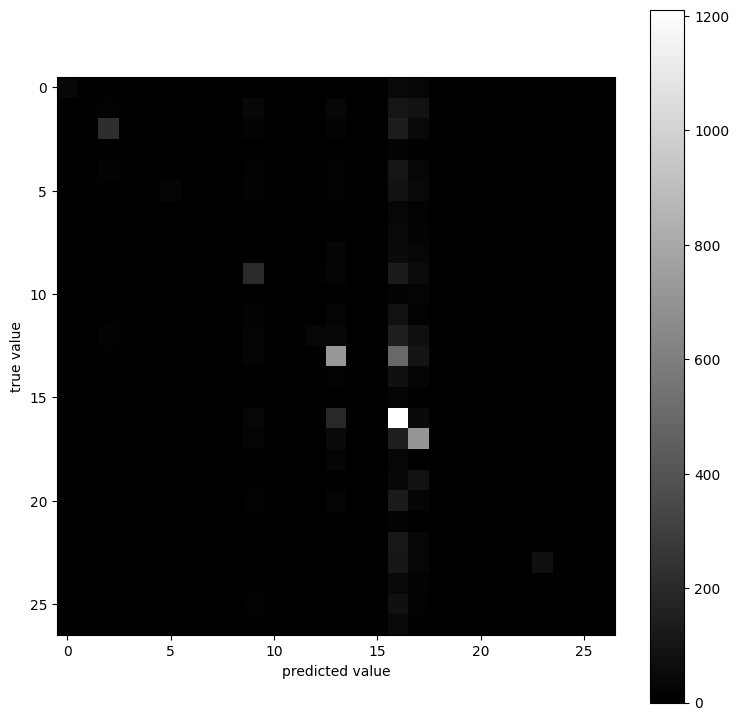

Classification Report:
              precision    recall  f1-score   support

           1       0.32      0.64      0.43        56
           2       0.01      0.67      0.01         3
           3       0.51      0.65      0.57       343
           4       0.00      0.00      0.00         0
           5       0.01      1.00      0.01         1
           6       0.13      0.96      0.23        27
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          12       0.46      0.43      0.44       466
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.09      0.54      0.16        57
          16       0.54      0.57      0.55      1259
          17       0.03      1.00      0.06         4
          18       0.00      0.00      0.00         0
          19       0.81      0.34      0.48      3544
    

c:\Users\nahue\anaconda3\envs\master-cn\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nahue\anaconda3\envs\master-cn\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nahue\anaconda3\envs\master-cn\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [13]:
%matplotlib inline
#Fit a Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train,y_train)

y_hat = nb.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest',cmap='gray')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)
    plt.show()
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))

<div class = "alert alert-success">**QUESTION:** Identify the three most simple classes.
</div>

In [14]:
len(nb.feature_log_prob_)

27

In [15]:
#Save data for future use.
import pickle
ofname = open('NYT_data.pkl', 'wb')
s = pickle.dump([X_train,y_train,X_test,y_test],ofname)
ofname.close()

In [16]:
#What are the top N most predictive features per class?
N = 5
voc = vectorizer.get_feature_names_out()
for i, label in enumerate(np.unique(y)):
    topN = np.argsort(nb.feature_log_prob_[i])[-N:]
    print ('Code: '+ str(label) + ' Terms : '+ str([voc[i] for i in topN]))

Code: 1 Terms : ['cut', 'bush', 'economy', 'budget', 'tax']
Code: 2 Terms : ['race', 'gay', 'new', 'court', 'abortion']
Code: 3 Terms : ['care', 'medicare', 'drug', 'health', 'new']
Code: 4 Terms : ['safety', 'farm', 'new', 'farmers', 'food']
Code: 5 Terms : ['workers', 'strike', 'union', 'immigrants', 'new']
Code: 6 Terms : ['students', 'city', 'new', 'school', 'schools']
Code: 7 Terms : ['rules', 'warming', 'air', 'pollution', 'new']
Code: 8 Terms : ['blackout', 'california', 'power', 'energy', 'oil']
Code: 10 Terms : ['new', 'security', '800', 'flight', 'crash']
Code: 12 Terms : ['drug', 'case', 'death', 'new', 'police']
Code: 13 Terms : ['plan', 'security', 'new', 'social', 'welfare']
Code: 14 Terms : ['homeless', 'city', 'york', 'rent', 'new']
Code: 15 Terms : ['new', 'billion', 'deal', 'enron', 'microsoft']
Code: 16 Terms : ['bush', 'challenged', 'war', 'iraq', 'nation']
Code: 17 Terms : ['space', 'nasa', 'loss', 'shuttle', 'new']
Code: 18 Terms : ['business', 'bush', 'clinton', 

Let us check what would happen if we enrich the data set with the summary of the article.

In [17]:
raw_data = data['Title']+data['Summary']
raw_train = raw_data[split]
raw_test = raw_data[np.logical_not(split)]
y = data['Topic_2digit']
y_train = y[split]
y_test = y[np.logical_not(split)]

In [18]:
# Let us tokenize the data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=2, 
 stop_words='english', 
 strip_accents='unicode')

#example
test_string = raw_train[0]
print ("Example: " + test_string +"\n")
print ("Preprocessed: " + vectorizer.build_preprocessor()(test_string)+"\n")
print ("Tokenized:" + str(vectorizer.build_tokenizer()(test_string))+"\n")
print ("Analyzed data string:" + str(vectorizer.build_analyzer()(test_string))+"\n")


#Fit and convert data
X_train = vectorizer.fit_transform(raw_train)
X_test = vectorizer.transform(raw_test)

print ("\n")
print ("Number of tokens: " + str(len(vectorizer.get_feature_names_out())) +"\n")
print ("Extract of tokes:")
print( vectorizer.get_feature_names_out()[1000:1100])

Example: Nation's Smaller Jails Struggle To Cope With Surge in Inmates Jails overwhelmed with hardened criminals

Preprocessed: nation's smaller jails struggle to cope with surge in inmates jails overwhelmed with hardened criminals

Tokenized:['Nation', 'Smaller', 'Jails', 'Struggle', 'To', 'Cope', 'With', 'Surge', 'in', 'Inmates', 'Jails', 'overwhelmed', 'with', 'hardened', 'criminals']

Analyzed data string:['nation', 'smaller', 'jails', 'struggle', 'cope', 'surge', 'inmates', 'jails', 'overwhelmed', 'hardened', 'criminals']



Number of tokens: 11354

Extract of tokes:
['banned' 'banner' 'banning' 'bans' 'bansenate' 'banus' 'baptist'
 'baptists' 'bar' 'barak' 'barbie' 'bare' 'barely' 'bares' 'bargain'
 'bargaining' 'bargains' 'barnes' 'barney' 'baron' 'barons' 'barrage'
 'barred' 'barrel' 'barren' 'barrier' 'barriers' 'barring' 'bars' 'barter'
 'base' 'baseball' 'based' 'basement' 'bases' 'basespentagon' 'bashing'
 'basic' 'basis' 'baskeball' 'basketball' 'basks' 'basra' 'bastion' '

classification accuracy: 0.640268456375839


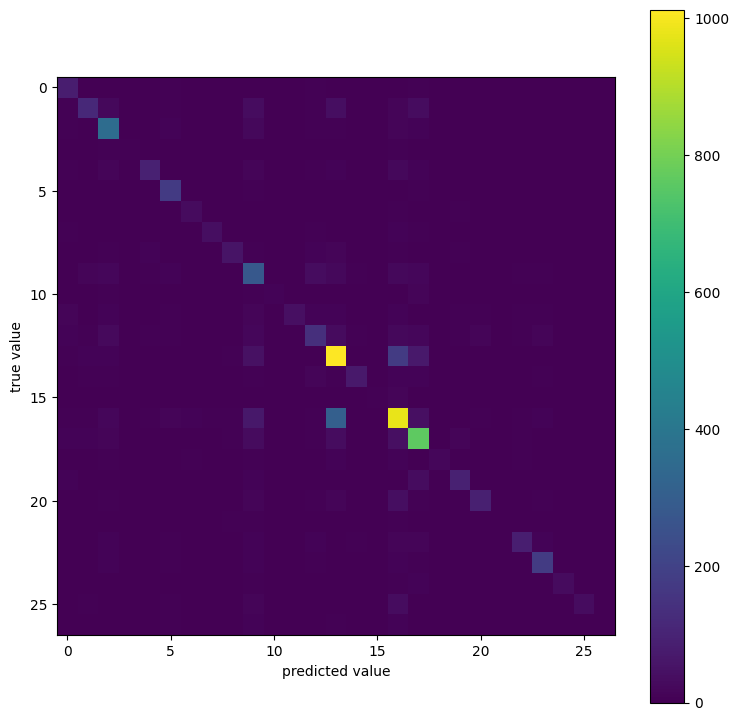

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.48      0.58       171
           2       0.41      0.61      0.49       189
           3       0.81      0.64      0.71       557
           4       0.23      0.88      0.37         8
           5       0.51      0.67      0.58       141
           6       0.87      0.66      0.75       259
           7       0.50      0.53      0.51        53
           8       0.54      0.74      0.62        53
          10       0.44      0.56      0.49        99
          12       0.64      0.45      0.53       623
          13       0.26      0.61      0.36        18
          14       0.28      0.78      0.41        51
          15       0.42      0.50      0.46       275
          16       0.76      0.66      0.71      1525
          17       0.50      0.68      0.58       105
          18       0.24      0.55      0.33        11
          19       0.66      0.67      0.66      1469
    

c:\Users\nahue\anaconda3\envs\master-cn\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nahue\anaconda3\envs\master-cn\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nahue\anaconda3\envs\master-cn\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [19]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
nb = BernoulliNB()
nb = MultinomialNB()
nb.fit(X_train,y_train)

y_hat = nb.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)
    plt.show()
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))

In [20]:
#Save data for future use.
import pickle
ofname = open('NYT_context_data.pkl', 'wb')
s = pickle.dump([X_train,y_train,X_test,y_test],ofname)
ofname.close()

In [21]:
#What are the top N most predictive features per class?
N = 5
voc = vectorizer.get_feature_names_out()
for i, label in enumerate(np.unique(y)):
    topN = np.argsort(nb.feature_log_prob_[i])[-N:]
    print ('Code: '+ str(label) + ' Terms : '+ str([voc[i] for i in topN]))

Code: 1 Terms : ['economy', 'cut', 'market', 'budget', 'tax']
Code: 2 Terms : ['new', 'race', 'gay', 'court', 'abortion']
Code: 3 Terms : ['medicare', 'care', 'new', 'drug', 'health']
Code: 4 Terms : ['new', 'farm', 'farmers', 'cow', 'food']
Code: 5 Terms : ['new', 'workers', 'union', 'strike', 'immigrants']
Code: 6 Terms : ['education', 'students', 'new', 'schools', 'school']
Code: 7 Terms : ['new', 'water', 'pollution', 'global', 'warming']
Code: 8 Terms : ['blackout', 'prices', 'energy', 'power', 'oil']
Code: 10 Terms : ['twa', 'new', '800', 'flight', 'crash']
Code: 12 Terms : ['scandal', 'death', 'abuse', 'new', 'police']
Code: 13 Terms : ['clinton', 'security', 'new', 'social', 'welfare']
Code: 14 Terms : ['york', 'homeless', 'housing', 'rent', 'new']
Code: 15 Terms : ['new', 'scandal', 'merger', 'antitrust', 'microsoft']
Code: 16 Terms : ['nato', 'challenged', 'nation', 'war', 'iraq']
Code: 17 Terms : ['loss', 'columbia', 'space', 'new', 'shuttle']
Code: 18 Terms : ['deal', 'sanc

Observe that adding the small summary improves the recognition rate by $10\%$. 

As a side note, Naive Bayes with these models creates a linear decision boundary. For this reason, sometimes NB is called a linear classifier.

# 4. Support Vector Machines


Support Vector Machines (SVM) is a prototypical example of discriminative learning. In this setting one explicitly assumes a function model class of the boundary. The classical model for SVM is a linear model. SVM is not the only discriminative linear model, e.g. perceptron, logistic classifier, etc. But, it is probably the most complete problem formulation.

Let us first check the intuition behind SVM,

In [22]:
%matplotlib inline
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

class HLA():
    def __init__(self):
        np.random.seed(1)
        self.X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
        self.y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b') 
        delta = 0.025
        xx = np.arange(-5.0, 10.0, delta)
        yy = np.arange(-5.0, 10.0, delta)
        XX, YY = np.meshgrid(xx, yy)
        Xf = XX.flatten()
        Yf = YY.flatten()
        self.sz=XX.shape
        self.data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

    def run(self,w0,w1,offset):
        w=np.array([w0,w1])
        w.shape=(2,1)
        Z = self.data.dot(w)+offset
        Z.shape=self.sz
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-30, vmax=30)
        XX = self.data[:,0].reshape(self.sz)
        YY = self.data[:,1].reshape(self.sz)
        plt.contour(XX,YY,Z,[0])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
        plt.show()
   

def decorator(w0,w1,offset):
    widget_hla.run(w0,w1,offset)
    
widget_hla = HLA()
interact(decorator, w0=(-10.,10.), w1=(-10.,10.), offset=(-20.,40.));


interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

<div class = "alert alert-success">**QUESTION:** Using the former widget, check manually the following configurations:

<li> $(w_0,w_1,\text{offset}) = (-1.7, -3.1, 10)$
<li> $(w_0,w_1,\text{offset}) = (-3.7, -0.5, 10.3)$
<li> $(w_0,w_1,\text{offset}) = (-7.5, -3.2, 28.8)$
<p>
Which one of those configuration do you think yields a better boundary? Why?
</div>

<div class="alert alert-info">
**INTUITION:** The Support Vector Machine classifer finds the boundary with maximum distance/**margin** to both classes.</div>

Observations:
- It implicitly models the notion of noise. One expects that the boundary with maximum margin will be robust to small perturbations in the data.
- A maximum margin classifier has a unique solution in the separable case.

Let us check the result of fitting a SVM classifier using sklearn:

Number of support vectors: 3
(w0,w1) = [-7.58277576 -3.19765261]
offset = 28.69764740799983


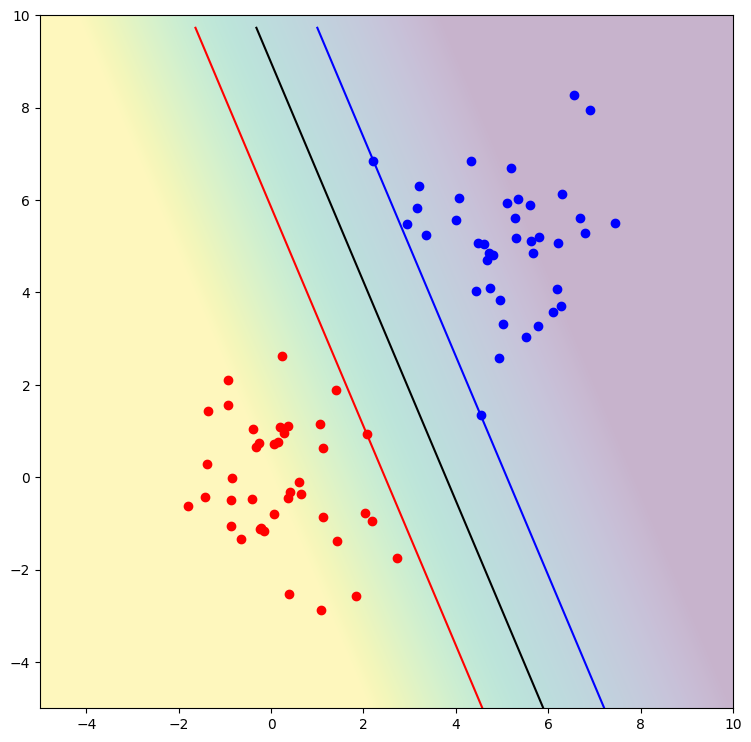

In [23]:


%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

class svm_example():
    def __init__(self):
        '''Data creation'''
        np.random.seed(1)
        self.X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
        self.y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

    def run(self):
        '''Fit a linear SVM'''
        self.clf = svm.SVC(kernel='linear')
        self.clf.fit(self.X,self.y.ravel())
        
    def display(self):
        '''Display stuff'''
        delta = 0.25
        xx = np.arange(-5.0, 10.0, delta)
        yy = np.arange(-5.0, 10.0, delta)
        XX, YY = np.meshgrid(xx, yy)
        Xf = XX.flatten()
        Yf = YY.flatten()
        sz=XX.shape
        data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
        Z=self.clf.decision_function(data)
        Z.shape=sz
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-3, vmax=3)
        XX = data[:,0].reshape(sz)
        YY = data[:,1].reshape(sz)
        plt.contour(XX,YY,Z,[-1,0,1],colors=['b','k','r'])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
        print ('Number of support vectors: ' + str(np.sum(self.clf.n_support_)))
        plt.scatter(self.clf.support_vectors_[:, 0], 
           self.clf.support_vectors_[:, 1], 
           s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)
        print ('(w0,w1) = ' + str(10*self.clf.coef_[0]))
        print ('offset = ' + str(10*self.clf.intercept_[0]))
        return XX,YY,Z



c = svm_example()
c.run()
XX,YY,Z=c.display()
plt.show()

Observe that there is a critical subset of data points. These are called **Support Vectors**. If any of those points disappear the boundary changes.  The decision boundary depends on the support vectors, thus we have to store them in our model.

## 3.1 Modeling the Support Vector Machine.

### 3.1.1 Geometry of the hyperplane
A hyperplane in ${\bf R}^d$ is defined as an affine combination of the variables: $\pi\equiv a^Tx + b = 0$. 

Features:

+ A hyperplane splits the space in two half-spaces. The evaluation of the equation of the hyperplane on any element of one of the half-space is a positive value. It is a negative value for all the elements in the other half-space.
+ The distance of a point $x \in{\bf R}^d$ to the hyperplane $\pi$ is 
$$d(x,\pi)=\frac{a^Tx+b}{\|a\|_2}$$


### 3.1.2 Modeling the separating hyperplane
Given a binary classification problem with training data $\mathcal{D}=\{(x_i,y_i)\},\; i=1\dots N, \; y_i\in\{+1,-1\} $. Consider $\mathcal{S} \subseteq \mathcal{D}$ the subset of all data points belonging to class $+1$, $\mathcal{S}=\{x_i | y_i=+1\}$, and $\mathcal{R}=\{x_i | y_i=-1\}$ its complement. 

Then the problem of finding a separating hyperplane consists of fulfilling the following constraints

$$a^Ts_i+b>0\; \text{and}\; a^Tr_i+b<0 \quad \forall s_i\in\mathcal{S}, r_i\in\mathcal{R}.$$

Note the strict inequalities in the formulation. Informally, we can consider the smallest satisfied constraint. And observe that the rest must be satisfied with a larger value. Thus, we can arbitrarily set that value to 1 and rewrite the problem as $$a^Ts_i+b\geq 1\; \text{and}\; a^Tr_i+b\leq -1.$$

This is a *feasibility problem* and it is usually written in the following way in optimization standard notation

$$
\begin{align}
\text{minimize} & \; 1\\
\text{subject to} &\;  a^T r_i + b \leq -1,\; \forall r_i \in \mathcal{R}\\
& a^T s_i + b \geq 1\; \forall s_i \in \mathcal{S}
\end{align}
$$

or in a compact way

$$
\begin{align}
\text{minimize} & \; 1\\
\text{subject to} & \; y_i (a^T x_i + b) \geq 1,\; \forall x_i \in \mathcal{D}\\
\end{align}
$$

The solution of this problem is not unique, e.g. remember all the parameters of the 'Human Learning Algorithm'.  

### 3.1.3 The maximum margin hyperplane

Selecting the maximum margin hyperplane requires to add a new constraint to our problem. Remember from the geometry of the hyperplane that the distance of any point to a hyperplane is given by $d(x,\pi)=\frac{a^Tx+b}{\|a\|_2}$. 

Recall that we want positive data to be beyond value 1 and negative data below -1. Thus, what is the distance value we want to maximize?

The positive point closest to the boundary is at $1/\|a\|_2$ and the negative point closest to the boundary data point is also at $1/\|a\|_2$. Thus data points from different classes are at least $2/\|a\|_2$ apart. 

Recall that our goal is to find the separating hyperplane with maximum margin, i.e. with maximum distance among elements from different classes. Thus, we can complete the former formulation with our last requirement as follows

$$
\begin{align}
\text{maximize} & \; 2/\|a\|_2 \\
\text{subject to} & \; y_i (a^T x_i + b) \geq 1,\; \forall x_i \in \mathcal{D}\\
\end{align}
$$

or equivalently,

$$
\begin{align}
\text{minimize} &\;  \|a\|_2/2 \\
\text{subject to} &\;  y_i (a^T x_i + b) \geq 1,\; \forall x_i \in \mathcal{D}\\
\end{align}
$$

This formulation has a solution as long as the problem is linearly separable.

### 3.1.4 Dealing with the non-separable case

In order to deal with misclassifications, we are going to introduce a new set of variables $\xi_i$, that represents the amount of violation in the $i-th$ constraint. If the constraint is already satisfied, then $\xi_i=0$, and $\xi_i>0$ otherwise. Because $\xi_i$ is related to the errors, we would like to keep this amount as close so zero as possible. This makes us introduce a element in the objective trading-off with the maximum margin.

The new model becomes

$$
\begin{align}
\text{minimize} & \; \|a\|_2/2 + C \sum\limits_{i=1}^N \xi_i\\
\text{subject to} & \; y_i (a^T x_i + b) \geq 1 - \xi_i,\; i=1\dots N\\
& \xi_i\geq 0
\end{align}
$$

where $C$ is the trade-off parameter that roughly balances margin and misclassification rate. This formulation is also called **soft-margin SVM**.

<div class="alert alert-info">**Take home ideas:**
<ul>
<li> Classical SVM fits a hyperplane separating boundary. </li>
<li> The hyperplane is defined to achieve the maximum margin. </li>
<li> If the problem is not linearly separable a new term related to the misclassification performance is introduced that trades-off with the margin. This trade-off is governed by parameter $C$ (or $\nu$ in $\nu$-SVM). </li>
</ul>
</div>

### 3.1.5 The New York Times problem again

Let us now apply our knowledge to the New York Times headlines topic prediction. 

Loading ok.
classification accuracy: 0.5316778523489933


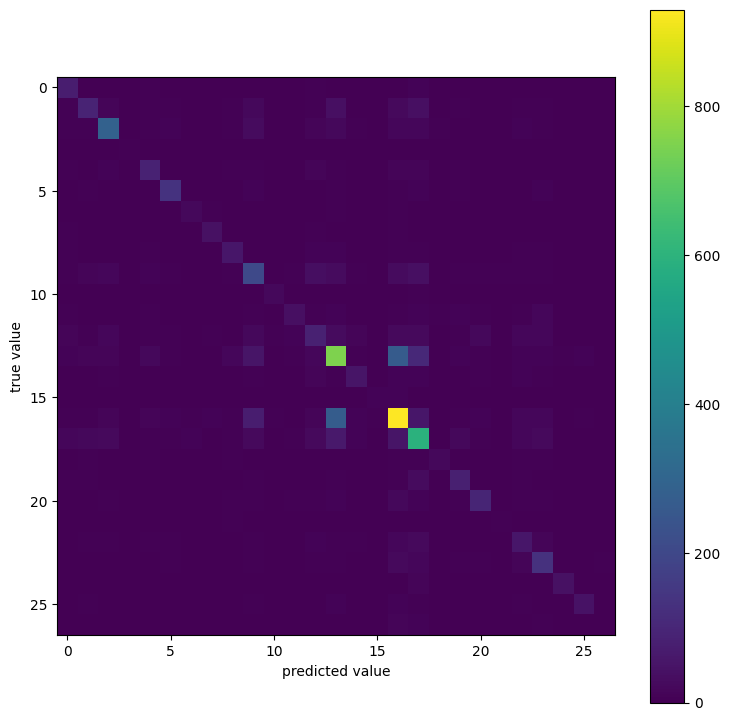

Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.43      0.52       173
           2       0.33      0.51      0.40       183
           3       0.65      0.65      0.65       440
           4       0.20      0.38      0.26        16
           5       0.48      0.47      0.47       187
           6       0.69      0.64      0.66       212
           7       0.38      0.33      0.35        63
           8       0.58      0.57      0.58        74
          10       0.44      0.42      0.43       132
          12       0.47      0.41      0.44       493
          13       0.49      0.44      0.46        48
          14       0.26      0.42      0.32        90
          15       0.26      0.31      0.29       277
          16       0.56      0.58      0.57      1290
          17       0.38      0.45      0.41       120
          18       0.32      0.24      0.28        33
          19       0.62      0.62      0.62      1488
    

In [25]:
#Recover NTY data
import pickle
fname = open('NYT_data.pkl','rb')
data = pickle.load(fname)
X_train = data[0]
y_train = data[1]
X_test = data[2]
y_test = data[3]
print ('Loading ok.')

from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train,y_train)

y_hat = clf.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9) 
    plt.show()
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))


Loading ok.
classification accuracy: 0.6136912751677852


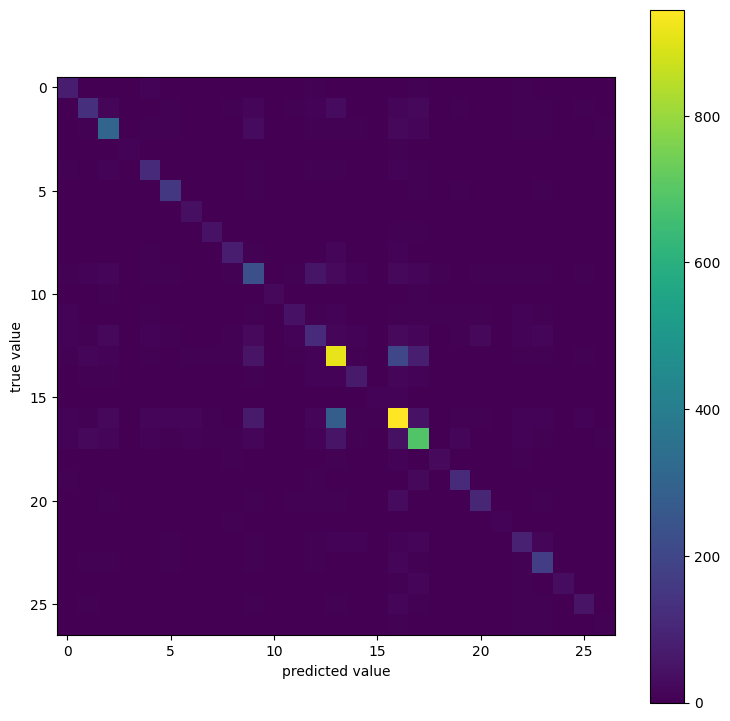

Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.49      0.56       154
           2       0.47      0.61      0.53       218
           3       0.70      0.67      0.69       459
           4       0.33      0.53      0.41        19
           5       0.62      0.58      0.60       195
           6       0.78      0.71      0.74       216
           7       0.66      0.47      0.55        79
           8       0.65      0.60      0.63        78
          10       0.59      0.57      0.58       129
          12       0.52      0.45      0.48       507
          13       0.47      0.61      0.53        33
          14       0.32      0.50      0.39        92
          15       0.36      0.42      0.38       280
          16       0.68      0.65      0.67      1388
          17       0.49      0.50      0.50       137
          18       0.44      0.42      0.43        26
          19       0.63      0.66      0.65      1424
    

In [26]:
#Recover NTY data
import pickle
import numpy as np
fname = open('NYT_context_data.pkl','rb')
data = pickle.load(fname)
X_train = data[0]
y_train = data[1]
X_test = data[2]
y_test = data[3]
print ('Loading ok.')

from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train,y_train)

y_hat = clf.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)  
    plt.show()
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))

Using the default parameters we can improve the recognition rate by $10\%$. However we can not check the most important words. Can we find a better trade-off?

In [27]:
#Let us check a cross-validation grid search

from sklearn import model_selection
parameters = {'C':[0.01, 0.05, 0.1, 0.5, 1, 10]}
svc= svm.LinearSVC()
clf = model_selection.GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)

,estimator,LinearSVC()
,param_grid,"{'C': [0.01, 0.05, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


The best parameterization is {'C': 0.05}
The achieved score is 0.6804177426208022
Checking the rest of the scores 

[0.65205094 0.68041774 0.6795272  0.65340791 0.63907606 0.6040946 ]


C:\Users\nahue\AppData\Local\Temp\ipykernel_11676\3459927389.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0.01, 0.05, 0.1, 0.5, 1, 10])


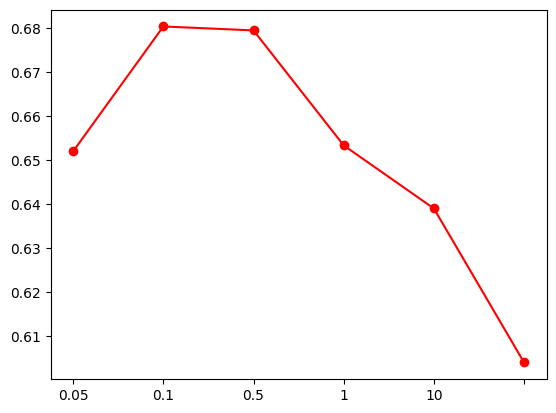

In [28]:
print ('The best parameterization is ' + str(clf.best_params_))
print ('The achieved score is ' + str(clf.best_score_))

print ('Checking the rest of the scores \n')
import matplotlib.pyplot as plt
print(clf.cv_results_['mean_test_score'])

plt.plot(clf.cv_results_['mean_test_score'],'r',marker='o')
ax = plt.gca()
ax.set_xticklabels([0.01, 0.05, 0.1, 0.5, 1, 10])    
plt.show()



classification accuracy: 0.6595973154362416


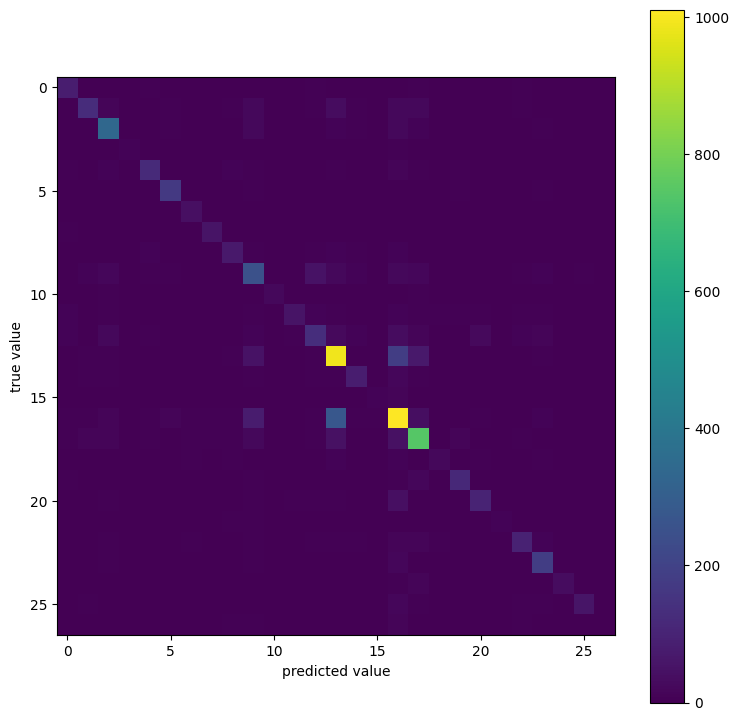

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.56      0.62       144
           2       0.46      0.68      0.55       189
           3       0.77      0.72      0.74       473
           4       0.37      0.79      0.50        14
           5       0.65      0.70      0.67       171
           6       0.84      0.76      0.80       220
           7       0.73      0.55      0.63        74
           8       0.75      0.69      0.72        78
          10       0.57      0.57      0.57       125
          12       0.57      0.48      0.52       518
          13       0.51      0.71      0.59        31
          14       0.37      0.68      0.48        79
          15       0.40      0.53      0.46       253
          16       0.74      0.68      0.71      1454
          17       0.57      0.61      0.59       131
          18       0.32      0.50      0.39        16
          19       0.68      0.66      0.67      1539
    

In [29]:
y_hat = clf.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9) 
    plt.show()
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))